<h2>: Financial Portfolio Optimization</h2>

[*********************100%***********************]  5 of 5 completed


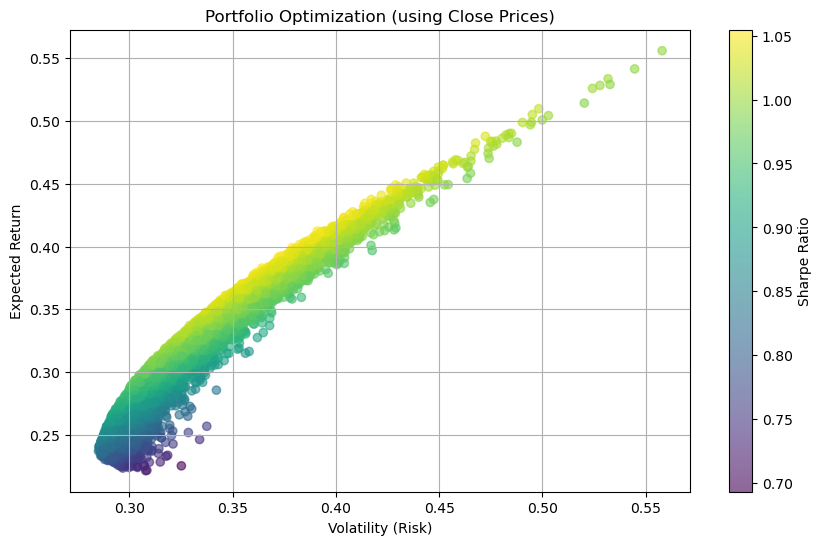

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Stocks list
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# Download stock data with `group_by='ticker'` to get simpler structure
data = yf.download(stocks, start='2020-01-01', group_by='ticker')

# Extract 'Close' prices (since 'Adj Close' is missing)
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in stocks})

# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Monte Carlo simulation parameters
num_portfolios = 10000
num_stocks = len(stocks)

results = np.zeros((3, num_portfolios))

# Run simulations
for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)

    port_return = np.sum(returns.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = port_return / port_volatility

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization (using Close Prices)')
plt.grid(True)
plt.show()
